In [1]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm 
import pylab as py 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)

In [3]:
df = pd.read_csv("carbon.csv")
df.head()

,DATE_TIME,IBF_ASH,IBF_MOISTURE,IBF_CRI,IBF_CSR,AMS_IBF,IBF GCQI,ORE_RATE,SINTER_RATE,COKE_RATE,PYROXINITE_RATE,QUARTZ_RATE,LIMESTONE_RATE,COAL_RATE,SLAG_RATE,K2O_IN_SLAG,K2O_IN,K2O_OUT,K2O_FLUSHING,PELLET_RATE,CORR_PRODUCTION,CORR_PI,CORR_CARBON_RATE,SINTER_PERC,CORR_NC_RATE,SLAGRATE,K2O Input,K2O slag,K2O Flushing,0,SINTER_RATE.1,QUARTZ_RATE.1,PYROXINITE_RATE.1,LIMESTONE_RATE.1,HMT,OXYGEN,DOLOMITE_RATE,Total Agglomerate,OVERALL MOIST LOAD (KG/THM),DUST FROM DUST CATCHER (Tons),SLURRY FROM PRESS FILTER,CAST_DURATION,SPEED,DELTA_HM_TEMP,DELTA_HM_WT,BGV,CLT,MVAL,FVAL,DCI,TFR,REL_DEADMAN_TEMP,MODIFIED_ALPHA_BY_BETA,ORE_BY_COKE_RADAR1,ORE_BY_COKE_RADAR2,C,SI,S,TI,CAO_SIO2,CAOMGOSIO2,HM_TEMP,Slag Fludity Index,CENTRE COKE,PERC_CENTRE_COKE,COLD_BLAST_HUMIDITY,ETA_CO,LOWER_K,MIDDLE_K,UPPER_K,O2_ENRICHMENT,O2_FLOW,PERC_COKE_FINES_PRV_DAY,PERC_ORE_FINES_PRV_DAY,PERC_PELLET_FINES_PRV_DAY,PERC_SINTER_FINES_PRV_DAY,RAFT,TG_VOLUME,UPTAKE_TEMP_AVG,UPTAKE_TEMP_MAX_MIN,AVG. SKIN_FLOW_TEMP,COLD_BLAST_FLOW_RATE,Tuy Vel (m/s),Top Gas Pressure,Delta P,HOT_BLAST_TEMP,BFG_CO,BFG_CO2,BFG_H2,BFG_N2,AVG\n(A6&B6),AVERAGE_ROOTHEIGHT,CIRCUIT_3_HL_MJ_H,TOTAL_HEAT_LOSS_GJ_H,MEAN_SIZE,CORR_COKE_RATE,CORR_COAL_RATE
0,1-Apr-17,16.27,3.10,26.0,66.2,44.57,138.26,209,807,305,2,22,0,206,310,0.48,1.55,1.48,95.7,597,9557,2.96,426,50,18,310,1.49,1.42,95.3,24,807,22,2,0,1516,943,0,87.0,24,54.0,187,1475,5.96,7,249,8182,186,16.5,2.68,259.0,0.87,969,1.27,1.79,1.74,4.57,0.67,0.049,0.062,1.03,1.34,1516,130,4.97,24.47,29.1,50.79,1.53,0.77,0.55,7.72,32502,30.3,1.7,2.3,18.9,2110,517676,119,17,156,300054,185,150119.37,-150000.68,1229,24.9,25.7,4.1,45.2,90,6.76,54653,95,11.76,303,205
1,2-Apr-17,15.78,3.27,26.0,66.5,44.98,137.71,206,715,307,10,0,0,207,303,0.57,1.78,1.74,97.5,663,9369,2.90,433,45,14,303,1.45,1.67,115.8,43,715,0,10,0,1516,856,33,87.0,28,34.0,99,1485,6.27,18,160,7930,193,16.4,2.61,285.0,0.86,980,1.30,1.41,1.39,4.53,0.66,0.040,0.070,1.02,1.34,1516,127,5.17,24.75,23.5,49.89,1.69,0.84,0.46,8.49,34705,30.6,1.9,0.9,20.2,2166,503917,97,13,95,288102,178,144139.73,-144042.67,1239,25.6,25.5,4.3,44.6,82,6.76,86156,122,11.96,308,208
2,3-Apr-17,15.51,2.73,24.9,68.1,45.58,138.97,220,753,295,8,10,0,217,296,0.42,1.34,1.25,93.6,596,8532,2.64,437,48,16,296,1.46,1.29,88.4,19,753,10,8,0,1499,951,0,86.0,23,38.0,99,1530,5.39,31,199,7407,188,14.6,2.97,211.0,0.82,776,1.33,1.20,1.38,4.57,0.74,0.034,0.077,1.10,1.34,1499,86,4.99,24.58,25.0,50.98,1.43,0.84,0.52,8.73,32620,30.2,2.6,3.4,17.8,2081,462148,115,17,152,267074,165,133619.67,-133504.91,1181,24.8,25.8,4.5,45.0,105,4.67,79531,117,11.86,301,221
3,4-Apr-17,14.97,2.73,24.9,67.3,46.40,139.46,225,721,319,15,10,0,203,316,0.53,1.84,1.69,91.5,659,9149,2.83,440,45,18,317,1.50,1.71,114.1,24,721,10,15,0,1508,994,0,86.0,27,88.0,162,1675,5.92,18,273,8018,197,16.7,2.68,244.0,0.85,990,1.29,1.20,1.62,4.54,0.75,0.042,0.073,1.07,1.34,1508,110,5.12,24.52,27.0,49.52,1.62,0.82,0.41,8.22,33999,31.1,2.5,1.1,18.4,2169,508113,100,12,129,292602,181,146391.25,-146291.31,1239,25.7,25.2,4.2,44.9,73,3.84,81384,120,11.82,321,204
4,6-Apr-17,14.98,3.05,26.5,64.8,43.65,97.95,64,833,354,0,14,0,158,344,0.47,1.38,1.60,116.5,704,8909,2.76,436,52,19,344,1.58,1.61,102.0,41,833,14,0,0,1507,714,27,96.0,16,112.0,132,1525,5.72,8,214,8236,216,18.1,2.54,245.0,0.82,1023,1.18,0.85,1.67,4.61,0.55,0.046,0.051,1.05,1.34,1507,112,5.23,23.76,12.0,50.00,1.61,0.70,0.52,4.57,20855,31.6,2.9,0.7,13.1,2207,534845,128,27,162,340064,210,170136.87,-170008.99,1155,23.6,23.6,3.1,49.6,94,5.96,67878,105,11.99,357,160


In [4]:
df = df.drop(["DATE_TIME", "COKE_RATE", "COAL_RATE", ], axis=1)
df.head()

,IBF_ASH,IBF_MOISTURE,IBF_CRI,IBF_CSR,AMS_IBF,IBF GCQI,ORE_RATE,SINTER_RATE,PYROXINITE_RATE,QUARTZ_RATE,LIMESTONE_RATE,SLAG_RATE,K2O_IN_SLAG,K2O_IN,K2O_OUT,K2O_FLUSHING,PELLET_RATE,CORR_PRODUCTION,CORR_PI,CORR_CARBON_RATE,SINTER_PERC,CORR_NC_RATE,SLAGRATE,K2O Input,K2O slag,K2O Flushing,0,SINTER_RATE.1,QUARTZ_RATE.1,PYROXINITE_RATE.1,LIMESTONE_RATE.1,HMT,OXYGEN,DOLOMITE_RATE,Total Agglomerate,OVERALL MOIST LOAD (KG/THM),DUST FROM DUST CATCHER (Tons),SLURRY FROM PRESS FILTER,CAST_DURATION,SPEED,DELTA_HM_TEMP,DELTA_HM_WT,BGV,CLT,MVAL,FVAL,DCI,TFR,REL_DEADMAN_TEMP,MODIFIED_ALPHA_BY_BETA,ORE_BY_COKE_RADAR1,ORE_BY_COKE_RADAR2,C,SI,S,TI,CAO_SIO2,CAOMGOSIO2,HM_TEMP,Slag Fludity Index,CENTRE COKE,PERC_CENTRE_COKE,COLD_BLAST_HUMIDITY,ETA_CO,LOWER_K,MIDDLE_K,UPPER_K,O2_ENRICHMENT,O2_FLOW,PERC_COKE_FINES_PRV_DAY,PERC_ORE_FINES_PRV_DAY,PERC_PELLET_FINES_PRV_DAY,PERC_SINTER_FINES_PRV_DAY,RAFT,TG_VOLUME,UPTAKE_TEMP_AVG,UPTAKE_TEMP_MAX_MIN,AVG. SKIN_FLOW_TEMP,COLD_BLAST_FLOW_RATE,Tuy Vel (m/s),Top Gas Pressure,Delta P,HOT_BLAST_TEMP,BFG_CO,BFG_CO2,BFG_H2,BFG_N2,AVG\n(A6&B6),AVERAGE_ROOTHEIGHT,CIRCUIT_3_HL_MJ_H,TOTAL_HEAT_LOSS_GJ_H,MEAN_SIZE,CORR_COKE_RATE,CORR_COAL_RATE
0,16.27,3.10,26.0,66.2,44.57,138.26,209,807,2,22,0,310,0.48,1.55,1.48,95.7,597,9557,2.96,426,50,18,310,1.49,1.42,95.3,24,807,22,2,0,1516,943,0,87.0,24,54.0,187,1475,5.96,7,249,8182,186,16.5,2.68,259.0,0.87,969,1.27,1.79,1.74,4.57,0.67,0.049,0.062,1.03,1.34,1516,130,4.97,24.47,29.1,50.79,1.53,0.77,0.55,7.72,32502,30.3,1.7,2.3,18.9,2110,517676,119,17,156,300054,185,150119.37,-150000.68,1229,24.9,25.7,4.1,45.2,90,6.76,54653,95,11.76,303,205
1,15.78,3.27,26.0,66.5,44.98,137.71,206,715,10,0,0,303,0.57,1.78,1.74,97.5,663,9369,2.90,433,45,14,303,1.45,1.67,115.8,43,715,0,10,0,1516,856,33,87.0,28,34.0,99,1485,6.27,18,160,7930,193,16.4,2.61,285.0,0.86,980,1.30,1.41,1.39,4.53,0.66,0.040,0.070,1.02,1.34,1516,127,5.17,24.75,23.5,49.89,1.69,0.84,0.46,8.49,34705,30.6,1.9,0.9,20.2,2166,503917,97,13,95,288102,178,144139.73,-144042.67,1239,25.6,25.5,4.3,44.6,82,6.76,86156,122,11.96,308,208
2,15.51,2.73,24.9,68.1,45.58,138.97,220,753,8,10,0,296,0.42,1.34,1.25,93.6,596,8532,2.64,437,48,16,296,1.46,1.29,88.4,19,753,10,8,0,1499,951,0,86.0,23,38.0,99,1530,5.39,31,199,7407,188,14.6,2.97,211.0,0.82,776,1.33,1.20,1.38,4.57,0.74,0.034,0.077,1.10,1.34,1499,86,4.99,24.58,25.0,50.98,1.43,0.84,0.52,8.73,32620,30.2,2.6,3.4,17.8,2081,462148,115,17,152,267074,165,133619.67,-133504.91,1181,24.8,25.8,4.5,45.0,105,4.67,79531,117,11.86,301,221
3,14.97,2.73,24.9,67.3,46.40,139.46,225,721,15,10,0,316,0.53,1.84,1.69,91.5,659,9149,2.83,440,45,18,317,1.50,1.71,114.1,24,721,10,15,0,1508,994,0,86.0,27,88.0,162,1675,5.92,18,273,8018,197,16.7,2.68,244.0,0.85,990,1.29,1.20,1.62,4.54,0.75,0.042,0.073,1.07,1.34,1508,110,5.12,24.52,27.0,49.52,1.62,0.82,0.41,8.22,33999,31.1,2.5,1.1,18.4,2169,508113,100,12,129,292602,181,146391.25,-146291.31,1239,25.7,25.2,4.2,44.9,73,3.84,81384,120,11.82,321,204
4,14.98,3.05,26.5,64.8,43.65,97.95,64,833,0,14,0,344,0.47,1.38,1.60,116.5,704,8909,2.76,436,52,19,344,1.58,1.61,102.0,41,833,14,0,0,1507,714,27,96.0,16,112.0,132,1525,5.72,8,214,8236,216,18.1,2.54,245.0,0.82,1023,1.18,0.85,1.67,4.61,0.55,0.046,0.051,1.05,1.34,1507,112,5.23,23.76,12.0,50.00,1.61,0.70,0.52,4.57,20855,31.6,2.9,0.7,13.1,2207,534845,128,27,162,340064,210,170136.87,-170008.99,1155,23.6,23.6,3.1,49.6,94,5.96,67878,105,11.99,357,160


# Prediction of coal rate

In [5]:
df.shape

(318, 94)

In [6]:
df.isnull().sum()

IBF_ASH                          0
IBF_MOISTURE                     0
IBF_CRI                          0
IBF_CSR                          0
AMS_IBF                          0
IBF GCQI                         0
ORE_RATE                         0
SINTER_RATE                      0
PYROXINITE_RATE                  0
QUARTZ_RATE                      0
LIMESTONE_RATE                   0
SLAG_RATE                        0
K2O_IN_SLAG                      0
K2O_IN                           0
K2O_OUT                          0
K2O_FLUSHING                     0
PELLET_RATE                      0
CORR_PRODUCTION                  0
CORR_PI                          0
CORR_CARBON_RATE                 0
SINTER_PERC                      0
CORR_NC_RATE                     0
SLAGRATE                         0
K2O Input                        0
K2O slag                         2
K2O Flushing                     2
0                                0
SINTER_RATE.1                    0
QUARTZ_RATE.1       

In [7]:
df = df.dropna(subset=["DCI"])
df = df.dropna(subset=["CENTRE COKE"])
df = df.dropna(subset=["PERC_PELLET_FINES_PRV_DAY"])
df = df.dropna(subset=["PERC_SINTER_FINES_PRV_DAY"])
df = df.dropna(subset=["K2O slag"])

In [8]:
# Correlation Matrix

corr_matrix = df.corr()
corr_matrix

,IBF_ASH,IBF_MOISTURE,IBF_CRI,IBF_CSR,AMS_IBF,IBF GCQI,ORE_RATE,SINTER_RATE,PYROXINITE_RATE,QUARTZ_RATE,LIMESTONE_RATE,SLAG_RATE,K2O_IN_SLAG,K2O_IN,K2O_OUT,K2O_FLUSHING,PELLET_RATE,CORR_PRODUCTION,CORR_PI,CORR_CARBON_RATE,SINTER_PERC,CORR_NC_RATE,SLAGRATE,K2O Input,K2O slag,K2O Flushing,0,SINTER_RATE.1,QUARTZ_RATE.1,PYROXINITE_RATE.1,LIMESTONE_RATE.1,HMT,OXYGEN,DOLOMITE_RATE,Total Agglomerate,OVERALL MOIST LOAD (KG/THM),DUST FROM DUST CATCHER (Tons),SLURRY FROM PRESS FILTER,CAST_DURATION,SPEED,DELTA_HM_TEMP,DELTA_HM_WT,BGV,CLT,MVAL,FVAL,DCI,TFR,REL_DEADMAN_TEMP,MODIFIED_ALPHA_BY_BETA,ORE_BY_COKE_RADAR1,ORE_BY_COKE_RADAR2,C,SI,S,TI,CAO_SIO2,CAOMGOSIO2,HM_TEMP,Slag Fludity Index,CENTRE COKE,PERC_CENTRE_COKE,COLD_BLAST_HUMIDITY,ETA_CO,LOWER_K,MIDDLE_K,UPPER_K,O2_ENRICHMENT,O2_FLOW,PERC_COKE_FINES_PRV_DAY,PERC_ORE_FINES_PRV_DAY,PERC_PELLET_FINES_PRV_DAY,PERC_SINTER_FINES_PRV_DAY,RAFT,TG_VOLUME,UPTAKE_TEMP_AVG,UPTAKE_TEMP_MAX_MIN,AVG. SKIN_FLOW_TEMP,COLD_BLAST_FLOW_RATE,Tuy Vel (m/s),Top Gas Pressure,Delta P,HOT_BLAST_TEMP,BFG_CO,BFG_CO2,BFG_H2,BFG_N2,AVG\n(A6&B6),AVERAGE_ROOTHEIGHT,CIRCUIT_3_HL_MJ_H,TOTAL_HEAT_LOSS_GJ_H,MEAN_SIZE,CORR_COKE_RATE,CORR_COAL_RATE
IBF_ASH,1.000000,0.023038,-0.237892,0.116928,0.032170,0.188822,0.185014,-0.090876,-0.012587,-0.038526,0.021788,-0.162964,-0.017444,-0.036850,-0.087717,-0.051726,-0.103742,0.059941,0.059747,-0.026688,-0.093248,0.003338,-0.162053,-0.006756,-0.053520,-0.060648,-0.015248,-0.090876,-0.038517,-0.010288,0.021788,0.037388,0.063990,-0.002297,-0.186442,0.164385,-0.117487,-0.008706,0.128032,-0.008948,-0.026561,-0.115634,0.015502,-0.047455,-0.052511,0.061816,-0.018390,0.040178,0.018754,-0.063762,0.099406,-0.105212,-0.093407,0.165228,-0.035700,0.197866,0.034434,-0.089205,0.037388,-0.014268,-0.078153,0.103347,0.220294,0.004670,-0.034291,0.015407,-0.075263,0.161194,0.150945,-0.028291,-0.005960,0.048704,0.153966,-0.118720,-0.094890,-0.074398,-0.066839,-0.040409,-0.169177,-0.166743,-0.169179,0.169133,0.211560,0.065767,0.056249,0.233608,-0.100186,0.014934,0.022645,0.057384,0.054223,-0.122403,-0.036950,0.055224
IBF_MOISTURE,0.023038,1.000000,-0.016936,0.035070,-0.180750,0.020877,-0.008276,0.023844,0.009824,0.029957,-0.033486,0.043247,-0.026755,0.143324,-0.010956,-0.129495,-0.011933,-0.076074,-0.076344,0.146981,0.021934,0.004156,0.040657,0.145380,-0.031661,-0.075169,0.035980,0.023844,0.029595,0.009941,-0.033486,-0.031976,-0.037816,0.030383,0.007959,0.010645,0.003706,0.013190,0.021469,-0.005061,-0.031687,-0.045728,-0.002091,0.116839,0.078305,-0.038830,-0.117180,-0.086459,0.084093,0.036497,0.091008,-0.037993,0.086544,0.020618,-0.007036,0.002993,-0.011826,-0.105342,-0.031976,-0.038374,0.076174,-0.000187,0.011727,-0.134873,-0.027262,0.049137,0.032184,-0.112506,-0.117541,0.030149,0.009941,-0.040666,-0.079770,0.020444,-0.021254,0.084500,0.110423,-0.005948,0.085291,0.087828,0.085289,-0.085160,-0.090013,-0.021529,-0.129592,-0.018258,0.087196,0.068917,-0.038452,0.051097,0.045235,0.083939,0.146341,-0.083444
IBF_CRI,-0.237892,-0.016936,1.000000,-0.784701,-0.033867,-0.591173,-0.857257,0.256003,0.022889,0.069694,-0.096767,0.444878,-0.047412,0.035606,0.137581,0.121398,0.494602,-0.183389,-0.184559,0.023258,0.337512,0.120667,0.444814,-0.040139,0.136791,0.151117,-0.036858,0.256003,0.070660,0.026708,-0.096767,-0.203075,-0.252171,-0.062810,0.855548,-0.638363,0.134232,0.057240,-0.122694,0.068795,-0.006182,0.057892,-0.206892,0.082806,0.178710,-0.127943,0.066794,-0.036803,-0.242236,0.129907,-0.044402,0.017276,0.008012,-0.269988,-0.041816,-0.363745,-0.205219,-0.049222,-0.203075,0.038750,0.014701,-0.154861,-0.465486,0.293970,0.064526,0.125793,0.327339,-0.383019,-0.386130,0.163069,-0.023419,-0.103402,-0.414560,0.277331,0.195177,0.226269,0.390766,0.236609,0.262405,0.261754,0.262402,-0.262085,-0.467956,-0.164873,0.118291,-0.503297,0.090641,0.007031,0.017526,0.129542,0.150053,0.021425,0.133667,-0.140656
IBF_CSR,0.116928,0.035070,-0.784701,1.000000,-0.033526,0.593623,0.833291,-0.207653,-0.055716,0.018838,0.129092,-0.387202,

In [9]:
# Feature Selection


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X = df.iloc[:,0:-2]  #independent columns
Y = df.iloc[:,-1]    #target column 
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))  #print 30 best features

                   Specs       Score
43                   CLT  648.568640
23             K2O Input  529.686301
67         O2_ENRICHMENT  217.234289
68               O2_FLOW  211.590402
44                  MVAL  197.026853
73                  RAFT  146.388519
21          CORR_NC_RATE  101.095007
78  COLD_BLAST_FLOW_RATE   91.113132
80      Top Gas Pressure   91.112930
81               Delta P   91.094218
79         Tuy Vel (m/s)   89.629770
85                BFG_H2   84.944722
82        HOT_BLAST_TEMP   76.450626
84               BFG_CO2   74.011545
45                  FVAL   64.062360
63                ETA_CO   60.454396
86                BFG_N2   54.145624
32                OXYGEN   52.807355
17       CORR_PRODUCTION   45.664015
18               CORR_PI   45.417144
60           CENTRE COKE   45.104067
48      REL_DEADMAN_TEMP   36.085819
62   COLD_BLAST_HUMIDITY   29.835316
14               K2O_OUT   28.513428
39                 SPEED   22.639699
12           K2O_IN_SLAG   22.075083
5

In [10]:
x = df[["CLT", "K2O Input", "O2_ENRICHMENT", "O2_FLOW", "MVAL", "RAFT", "CORR_NC_RATE", "COLD_BLAST_FLOW_RATE",
        "Top Gas Pressure", "Delta P", "Tuy Vel (m/s)", "BFG_H2", "FVAL", "ETA_CO", "BFG_N2", "CORR_PRODUCTION", "OXYGEN",
       "CORR_PI", "CENTRE COKE", "REL_DEADMAN_TEMP", "COLD_BLAST_HUMIDITY", "K2O_OUT", "SPEED", "K2O_IN_SLAG",
       "SI", "IBF GCQI", "K2O_IN", "K2O slag"]]
y = df[["CORR_COAL_RATE"]]

In [11]:
# Initialise the Scaler 
scaler = StandardScaler() 
x = scaler.fit_transform(x)

In [12]:
# Splitting the Data set in training and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

# Multiple Linear Regression

In [13]:
# Fitting multiple linear regression to the training set 
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
#R-Square value
    
coefficient_of_dermination = r2_score(y_test, y_pred)
rms = sqrt(mean_squared_error(y_test, y_pred))
print("Score: {}".format(coefficient_of_dermination))
print("RMS: {}".format(rms))




Score: 0.9731276332878963
RMS: 2.8539576855163715


In [14]:
print(model.intercept_)
print(model.coef_)

[201.80231529]
[[-2.21314460e+00 -1.28182971e+00 -3.53007591e+00  9.58907128e+00
   1.92842741e-01 -9.17928671e+00  1.13902392e-01  9.48492341e+02
  -6.77251388e+02  2.74425787e+02 -1.69185211e+00  2.33278065e+00
   4.86528431e-01 -9.90231042e-01 -6.47882050e-01  8.77131942e+00
   8.97380017e-01 -1.17241581e+01  6.06413317e-01  2.69958033e+00
  -1.20085207e+01  1.44078471e+00 -2.79009512e-02 -2.11389832e+00
  -2.95555722e-01  3.36783911e-01  4.44134720e-01  1.21749739e+00]]


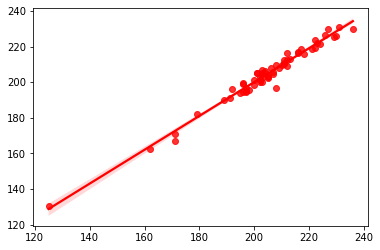

In [15]:
# Original vs Predicted
y_test = y_test.values.reshape(62,)
y_pred = y_pred.reshape(62,)
sns.regplot(y_test, y_pred, color = 'red') 

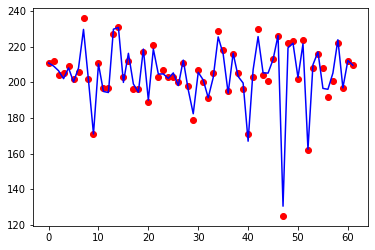

In [16]:
x1 = np.arange(0,62)
plt.scatter(x1,y_test, color="red")
plt.plot(x1,y_pred, color="blue")

In [17]:
y_pred_all = model.predict(x)
df["y_pred_all"] = y_pred_all
print(df.iloc[:20,-2:])


    CORR_COAL_RATE  y_pred_all
0              205  205.703793
1              208  209.857743
2              221  231.018568
3              204  202.487071
4              160  160.047410
5              208  196.613054
6              155  158.841070
7              189  189.986347
9              125  130.451249
10             198  203.990137
11             195  193.331661
12             207  212.877485
13             200  198.183770
14             211  215.028559
15             199  201.022218
16             203  204.685233
17             231  232.227230
18             213  212.784073
19             217  218.521336
20             167  169.267660


In [18]:
print ("Coefficient of Determination : ",r2_score(df['CORR_COAL_RATE'],y_pred_all))

Coefficient of Determination :  0.9720338026655572


# Decision Tree

In [19]:
from sklearn import tree

modelDT = tree.DecisionTreeRegressor(max_depth=10)
modelDT.fit(x_train,y_train)
y_pred = modelDT.predict(x_test)
coefficient_of_dermination = r2_score(y_test, y_pred)
rms = sqrt(mean_squared_error(y_test, y_pred))
print("Score: {}".format(coefficient_of_dermination))
print("RMS: {}".format(rms))

Score: 0.6607483702473045
RMS: 10.140410641079654


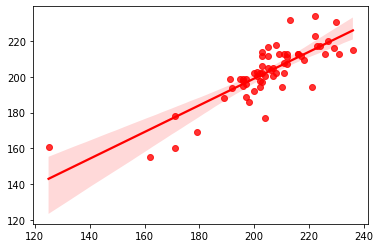

In [20]:
# Original vs Predicted
sns.regplot(y_test, y_pred, color = 'red')

# Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

modelRF = RandomForestRegressor(n_estimators = 10)
modelRF.fit(x_train,y_train)
y_pred = modelRF.predict(x_test)
coefficient_of_dermination = r2_score(y_test, y_pred)
rms = sqrt(mean_squared_error(y_test, y_pred))
print("Score: {}".format(coefficient_of_dermination))
print("RMS: {}".format(rms))

Score: 0.8179577298573115
RMS: 7.428150466626177


<ipython-input-21-85b2d76d5c67>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  modelRF.fit(x_train,y_train)


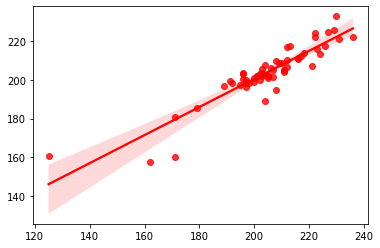

In [22]:
# Original vs Predicted
sns.regplot(y_test, y_pred, color = 'red') 

# SVR

In [23]:
from sklearn.svm import SVR

modelsvr = SVR(kernel="linear")
modelsvr.fit(x_train,y_train)
y_pred = modelsvr.predict(x_test)
coefficient_of_dermination = r2_score(y_test, y_pred)
rms = sqrt(mean_squared_error(y_test, y_pred))
print("Score: {}".format(coefficient_of_dermination))
print("RMS: {}".format(rms))


Score: 0.9757971788913865
RMS: 2.7084920575574007


/home/sourav/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


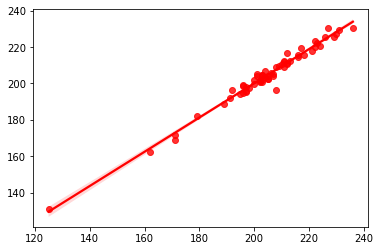

In [24]:
# Original vs Predicted
y_test = y_test.reshape(62,)
y_pred = y_pred.reshape(62,)
sns.regplot(y_test, y_pred, color = 'red')  

In [25]:
y_test.shape

(62,)

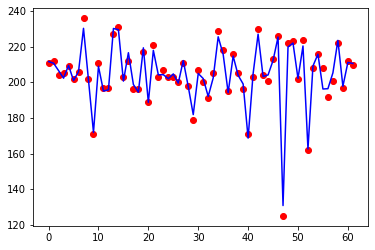

In [26]:
x1 = np.arange(0,62)
plt.scatter(x1,y_test, color="red")
plt.plot(x1,y_pred, color="blue")

### As SVR gives us least RMSE and maximum R-squared value, so it may be considered as final model for prediction.